# COMP 3115: Exploratory Data Analysis and Visualization
# Lab 9 Exercise on Data Clustering

Student Name: Yu Fengfei

Student Number: 21251215

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

## Q1. Import 'data2.csv' (x1, x2 are two features). Perform *K*-means algorithms on this data with k=2 and visualize the clustering results. Answer the following question based on the visualization.

### Does *k*-means algorithm work well on this dataset? And why?
### Your Answer: 
- The *k=2*-means algorithm does not work well.
- Reason: The clusters have different densities and non-spherical shapes. The second (i.e., lower-right) center has low data density around itself. The data points in the yellow group are more sparse than the purple one.

In [24]:
df2 = pd.read_csv('data.csv')
df2.head()

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


C:\Users\28185\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


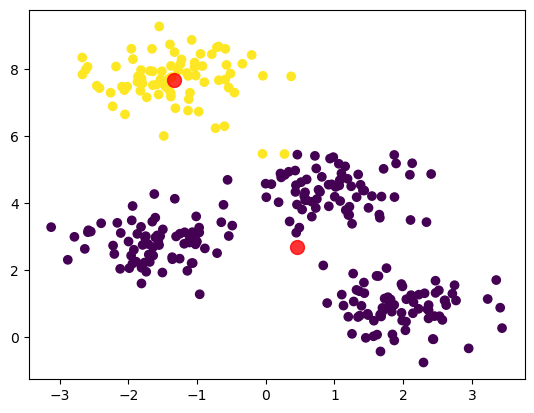

In [25]:
X2 = df2.values
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X2)
y_kmeans2 = kmeans2.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans2)

centers = kmeans2.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.8);

## Q2. Import 'data.csv' (x1, x2 are two features). Modify the 'my_k_means' function as shown in the lab tutorial to visualize the *k*-means clustering results in each iteration. Then apply your modified 'my_k_means' function on this imported data with k = 4.


In [26]:
df1 = pd.read_csv('data.csv')
df1.head()

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


In [27]:
def my_k_means_visualization(X, n_clusters, rseed=2):
    # Randomly choose n_clusters cluster centres
    rng = np.random.RandomState(rseed) # random number generator
    i = rng.permutation(X.shape[0])[:n_clusters] # select n_clusters data points randomly
    centers = X[i] # set the selected data points as centers
    
    iteration = 0
    while True:
        # Assign labels based on the closest center
        cluster_labels = pairwise_distances_argmin(X, centers)
        
        # Compute new centers per cluster
        new_centers = np.array([X[cluster_labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        # Modified part: Add visualization at each iteration
        plt.figure()
        plt.title(f'K-Means clustering Iter:{iteration}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.scatter(X[:, 0],X[:, 1], c=cluster_labels)
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.8)
        
        iteration += 1
    return centers, cluster_labels

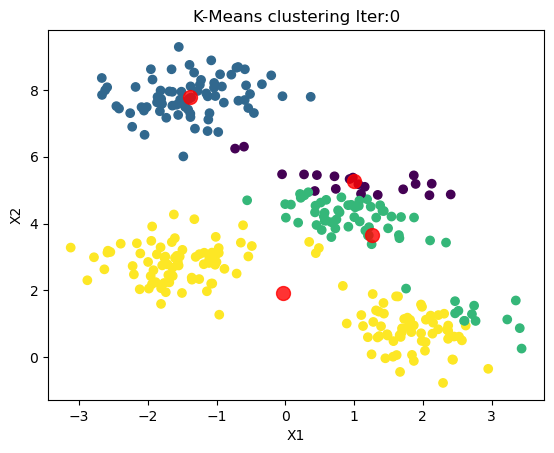

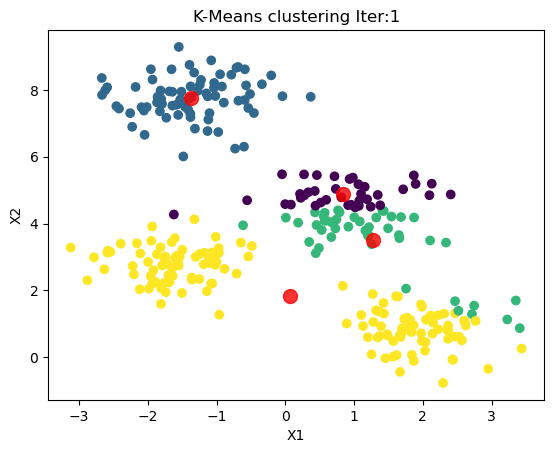

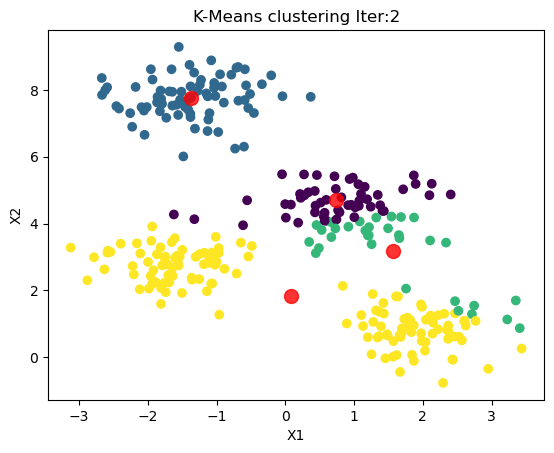

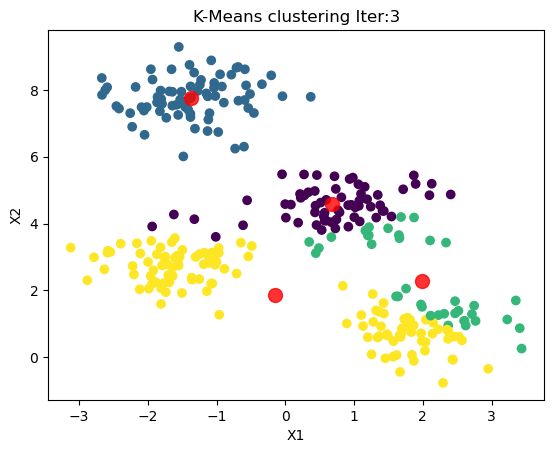

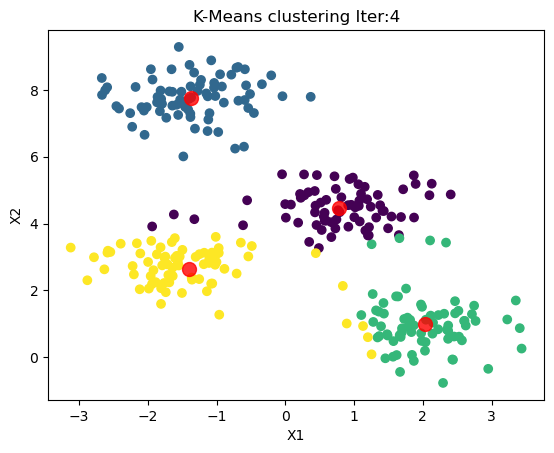

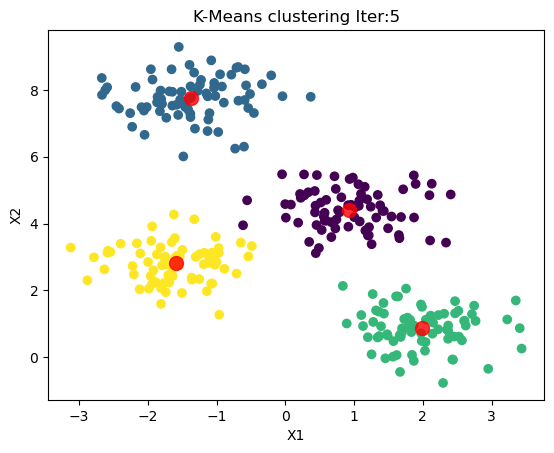

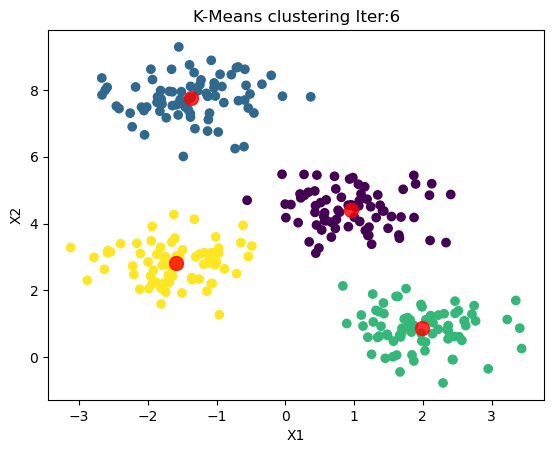

In [28]:
X1 = df1.values
centers, cluster_labels = my_k_means_visualization(X1, 4)

## Q3. Keep using 'data.csv' (x1, x2 are two features). Perform agglomerative clustering using complete linkage for computing cluster distance. Then, plot the dendrogram. Make your own selection for the number of clusters. Repeat the process using single linkage.

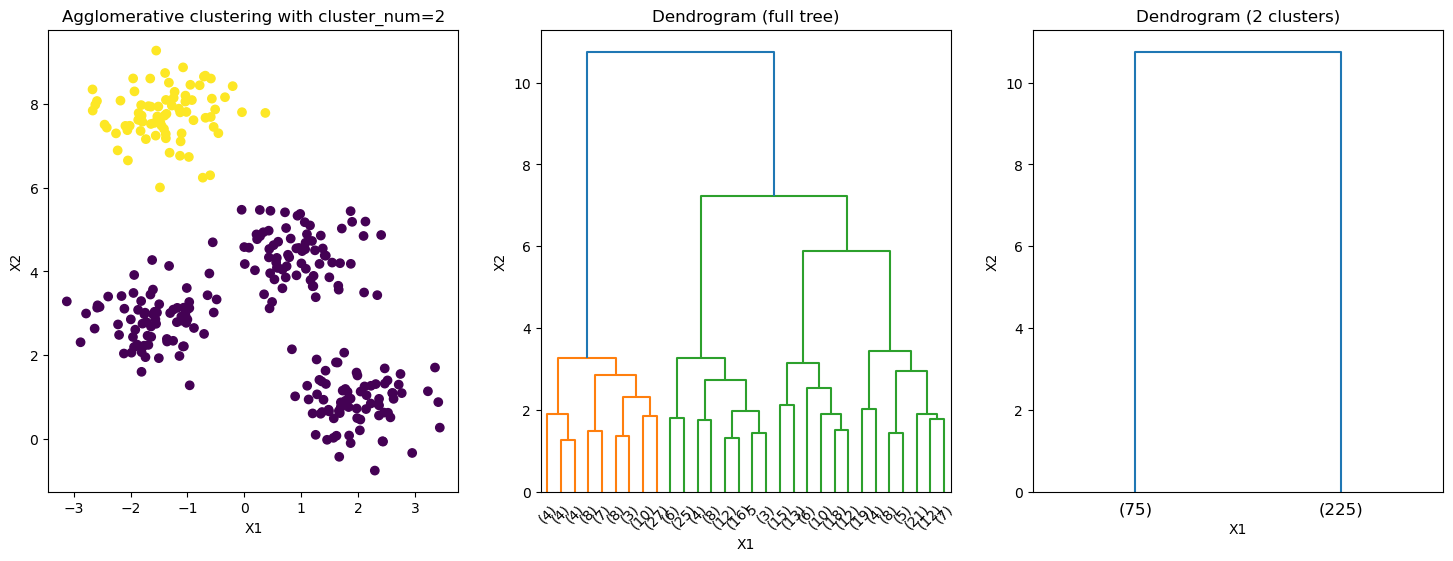

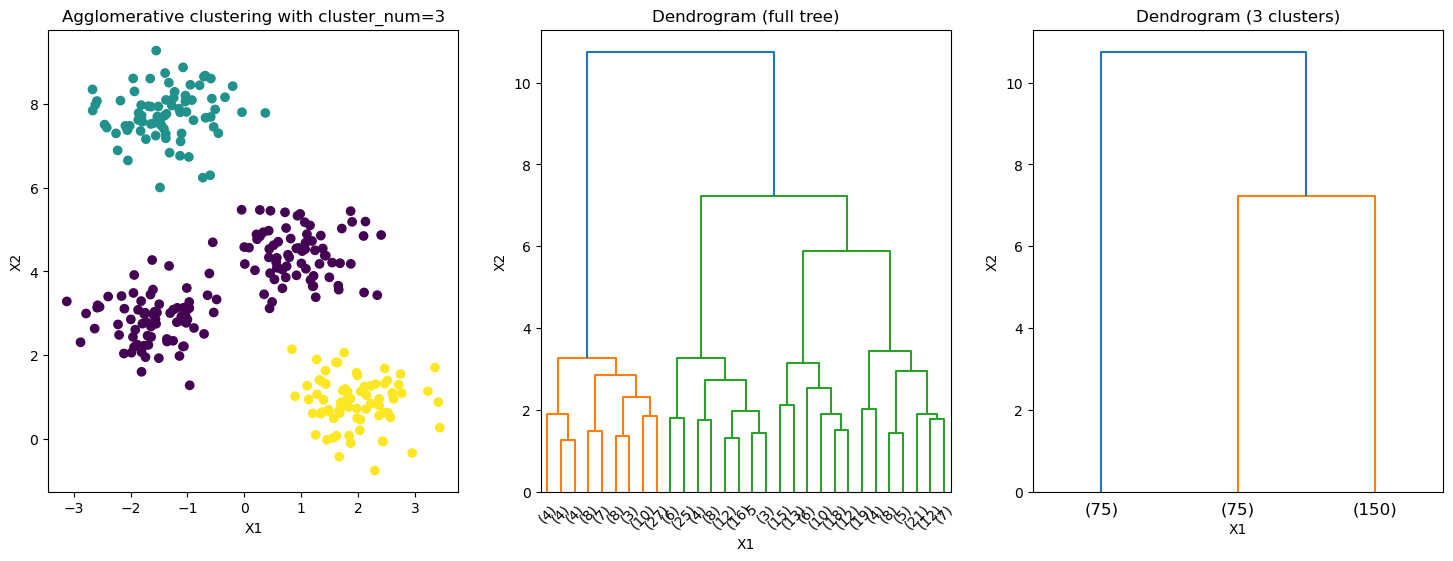

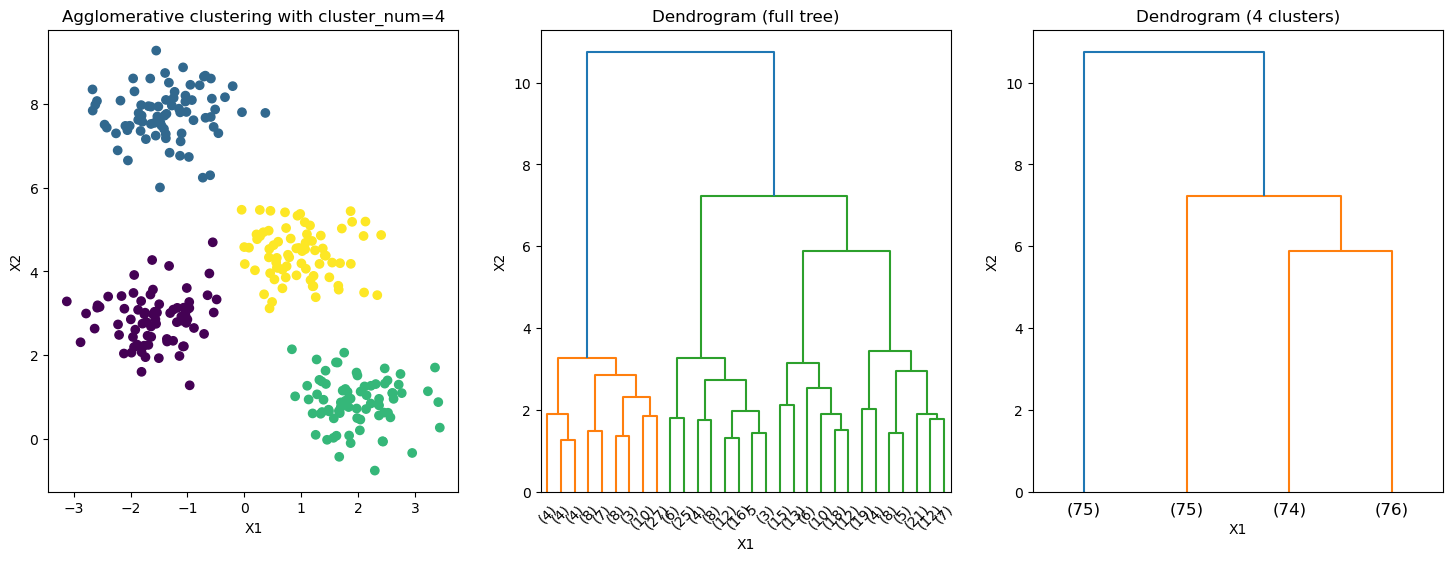

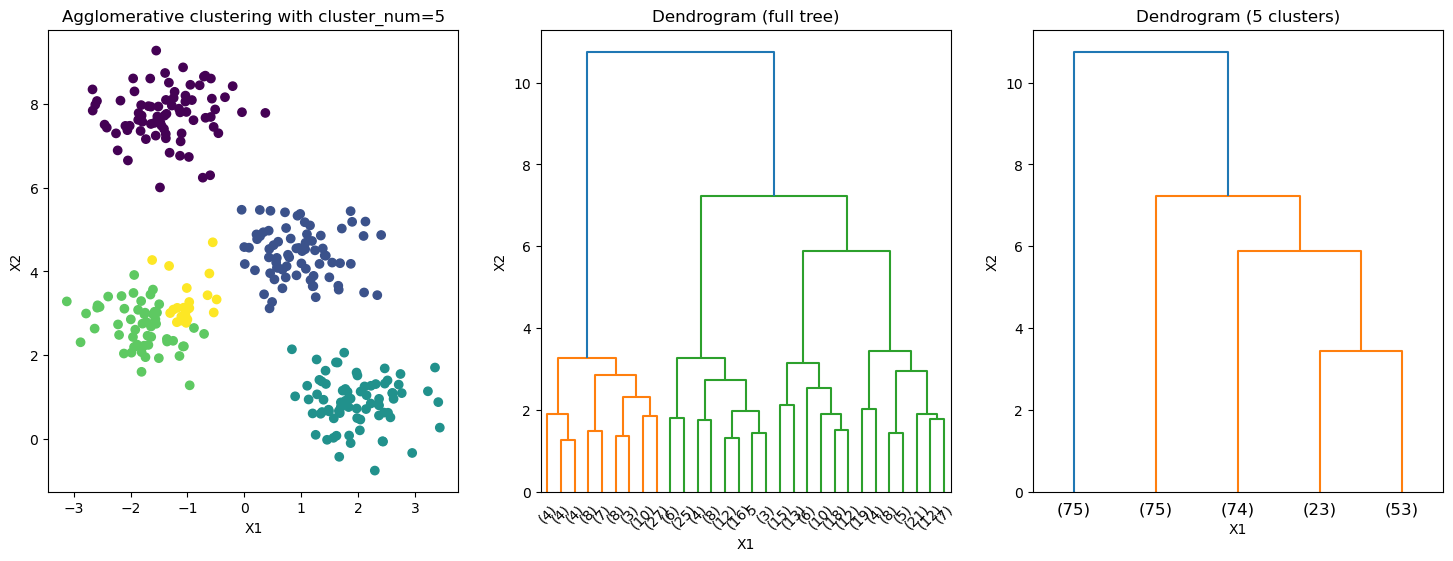

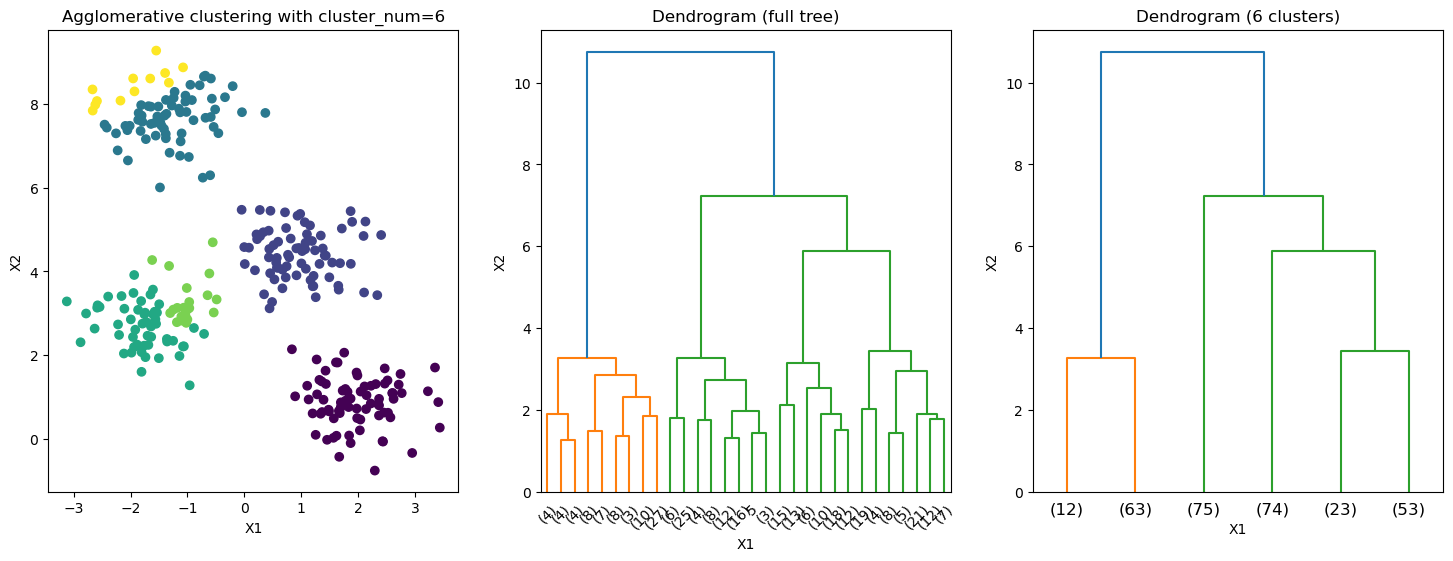

In [29]:
cluster_num = [2, 3, 4, 5, 6]

for num in cluster_num:
    agg = AgglomerativeClustering(n_clusters=num, linkage='complete')
    cluster_labels = agg.fit_predict(X1)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].scatter(X1[:, 0], X1[:, 1], c=cluster_labels, cmap='viridis')
    ax[0].set_title(f'Agglomerative clustering with cluster_num={num}')
    ax[0].set_xlabel('X1')
    ax[0].set_ylabel('X2')

    ax[1].set_title("Dendrogram (full tree)")
    ax[1].set_xlabel('X1')
    ax[1].set_ylabel('X2')
    shc.dendrogram(shc.linkage(X1, method='complete'), truncate_mode='lastp', ax=ax[1])

    ax[2].set_title(f"Dendrogram ({num} clusters)")
    ax[2].set_xlabel('X1')
    ax[2].set_ylabel('X2')
    shc.dendrogram(shc.linkage(X1, method='complete'), p=num, truncate_mode='lastp', ax=ax[2])

    plt.show()

## Q4. Read in hkbu4.jpg, perform agglomerative clustering using complete linkage on the pixel values, and show the resulting image. Set the number of clusters to 5. Try also single linkage. 

### Compare the results and comment.

### Your answer: 
   - Agglomerative clustering with complete linkage performs similarly to single linkage. Both methods successfully segment the original image into distinct layers. However, they struggle to capture fine-grained details, such as shaded areas, blue sky pixels in the window, and the tower tip. Their visual similarity to the original image is slightly inferior to K-means.

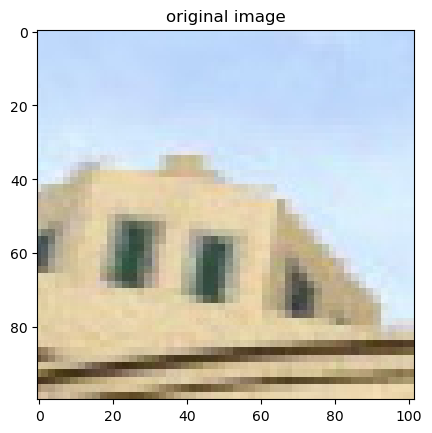

In [30]:
image = plt.imread("hkbu4.jpg")
width, height, depth = image.shape
reshaped_image = np.reshape(image, (width * height, depth))
num_clusters = 5

plt.figure()
plt.title("original image")
plt.imshow(image)

C:\Users\28185\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 80.56893543  74.66841187  51.42233857]
 [201.36493084 224.2874288  250.73616762]
 [188.4563253  173.93975904 142.10768072]
 [226.09090909 207.30031836 168.62221436]
 [127.32374101 120.31834532  95.6618705 ]]


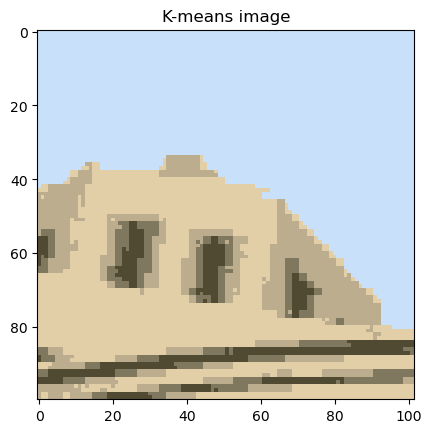

In [31]:
model = KMeans(n_clusters=num_clusters)
img_labels_kmeans = model.fit_predict(reshaped_image)
centroids_kmeans = model.cluster_centers_
quantized_image_kmeans = np.reshape(centroids_kmeans[img_labels_kmeans], (width, height, centroids_kmeans.shape[1])).astype('uint8')

print(centroids_kmeans)

plt.figure()
plt.title("K-means image")
plt.imshow(quantized_image_kmeans)

[[ 83.12386707  78.47885196  55.75679758]
 [201.51343818 223.87597054 249.57833964]
 [179.66514286 165.68571429 134.544     ]
 [222.43038366 203.76856436 165.11726485]
 [129.81617647 120.76470588  94.99509804]]


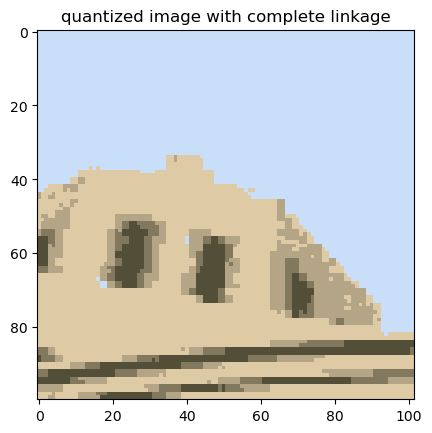

In [32]:
agg_img_complete = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete')
img_labels_complete = agg_img_complete.fit_predict(reshaped_image)

centroids_complete = np.array([
    reshaped_image[img_labels_complete == label].mean(axis=0)
    for label in np.unique(img_labels_complete)
])

print(centroids_complete)

quantized_image_complete = centroids_complete[img_labels_complete].reshape((width, height, depth)).astype('uint8')

plt.figure()
plt.title("quantized image with complete linkage")
plt.imshow(quantized_image_complete)

[[195.73685759 198.97126324 194.20184386]
 [ 53.          53.          53.        ]
 [194.         201.         219.        ]
 [188.         195.         211.        ]
 [129.         149.         121.        ]]


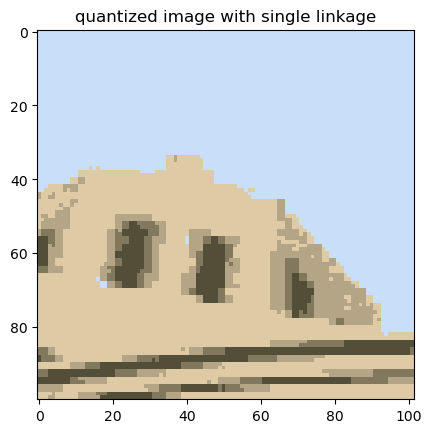

In [33]:
agg_img_single = AgglomerativeClustering(n_clusters=num_clusters, linkage='single')
img_labels_single = agg_img_single.fit_predict(reshaped_image)

centroids_single = np.array([
    reshaped_image[img_labels_single == label].mean(axis=0)
    for label in np.unique(img_labels_single)
])

print(centroids_single)

quantized_image_single = centroids_complete[img_labels_complete].reshape((width, height, depth)).astype('uint8')

plt.figure()
plt.title("quantized image with single linkage")
plt.imshow(quantized_image_single)